# Image Augmentation for Self-Supervised Learning

Image augmentation is key to neural network to generalize. It is now the backbone of self-supervised learning. This notebook will help you to experiment different image augmentation.
You can find the same example on the PyTorch page : https://pytorch.org/vision/master/auto_examples/plot_transforms.html

## Load the test image

In [1]:
import matplotlib.pyplot as plt
import torch
import os
from skimage import data
from PIL import Image
import torchvision.transforms as T

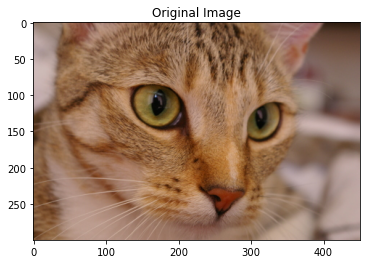

In [2]:
orig_img = Image.fromarray(data.cat(), 'RGB')
plt.figure()
plt.title("Original Image")
plt.imshow(orig_img, cmap=plt.cm.gray)

In [3]:
def show_images(images = [], figsize=(15,10), **imshow_kwargs):
    # Function to display multiple images
    fig, axs = plt.subplots(nrows=1, ncols=len(images), squeeze=False, figsize=figsize)
    for i in range(len(images)):
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        axs[0, i].imshow(images[i], **imshow_kwargs)
    plt.tight_layout()

## Grayscale

The Grayscale transform converts an image to grayscale.

<PIL.Image.Image image mode=L size=451x300 at 0x1ED3F4D0280>


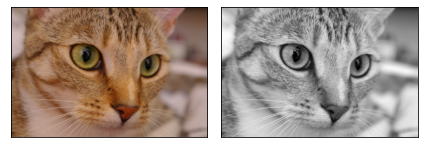

In [4]:
gray_img = T.Grayscale()(orig_img)
print(gray_img)
show_images([orig_img, gray_img], (6,10), cmap='gray')

- **Pretext Task** : Richard Zhang, Phillip Isola, Alexei A. Efros, "*Colorful Image Colorization*", 2016

## RandomRotation

The RandomRotation transform rotates an image with random angle.

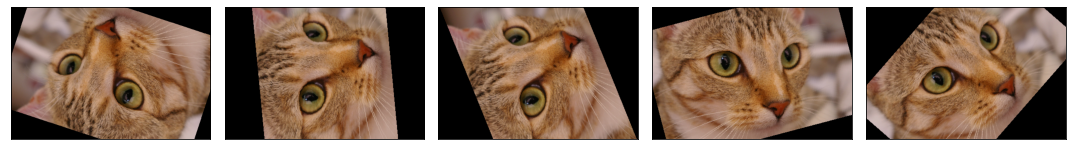

In [5]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(5)]
show_images(rotated_imgs)

- Spyros Gidaris, Praveer Singh, Nikos Komodakis, *"Unsupervised Representation Learning by Predicting Image Rotations"*, 2018

## ColorJitter

The ColorJitter transform randomly changes the brightness, saturation, and other properties of an image.

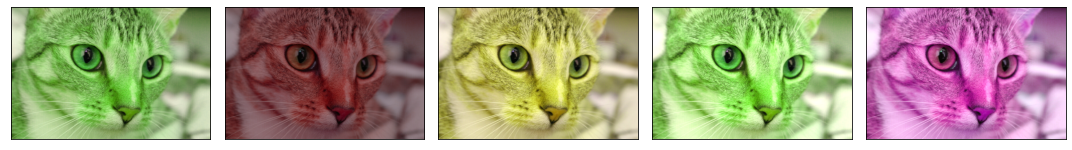

In [6]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(5)]
show_images(jitted_imgs)

- **SimCLR** : Ting Chen, Simon Kornblith, Mohammad Norouzi, Geoffrey Hinton, *"A Simple Framework for Contrastive Learning of Visual Representations"*, 2020

## GaussianBlur

The GaussianBlur transform performs gaussian blur transform on an image.

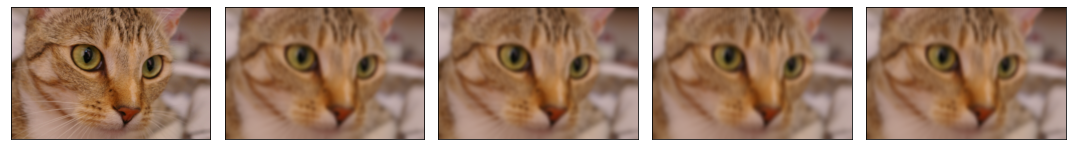

In [7]:
blurrer = T.GaussianBlur(kernel_size=(11, 21), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(5)]
show_images(blurred_imgs)

- **SimCLR** : Ting Chen, Simon Kornblith, Mohammad Norouzi, Geoffrey Hinton, "*A Simple Framework for Contrastive Learning of Visual Representations*", 2020

## RandomCrop

The RandomCrop transform crops an image at a random location.

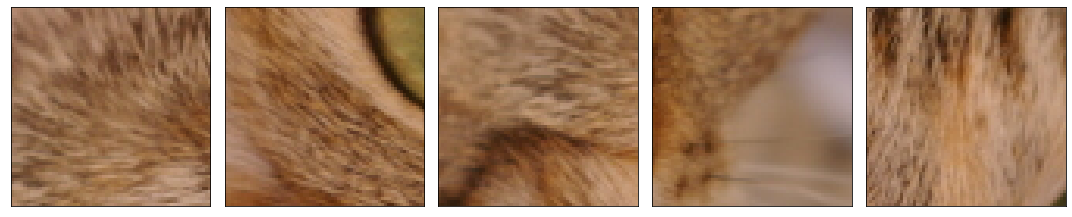

In [8]:
cropper = T.RandomCrop(size=(64, 64))
crops = [cropper(orig_img) for _ in range(5)]
show_images(crops)

## RandomResizedCrop

The RandomResizedCrop transform crops an image at a random location, and then resizes the crop to a given size.

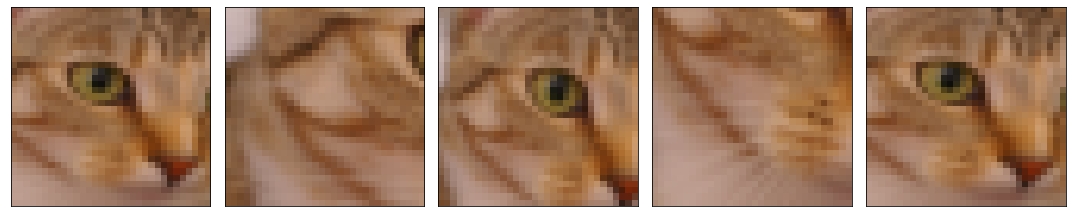

In [9]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(5)]
show_images(resized_crops)

- **SimCLR** : Ting Chen, Simon Kornblith, Mohammad Norouzi, Geoffrey Hinton, "*A Simple Framework for Contrastive Learning of Visual Representations*", 2020
- **SwAV** Unsupervised Learning of Visual Features by Contrasting Cluster Assignments, "Unsupervised Learning of Visual Features by Contrasting Cluster Assignments", 2021 (introduced the *multi-crop*)

## TODO - Add Augmentation for those papers

- Pathak et al., 2016, Context Encoders: Feature Learning by Inpainting
- Noroozi et al., 2016, Unsupervised Learning of Visual Representations by Jigsaw Puzzles
